In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from pathlib import Path

## Path to images

In [2]:
#path_images_base = '/home/julien/Dokumente/Beleg/BelegDaten/validation'
path_images_base = '/media/julien/Transcend/Beleg/data/validation'
path_ir = os.path.join(path_images_base, 'Infrared')
path_depth = os.path.join(path_images_base, 'Depth')

## Find all images that should be used

In [3]:
available_files = os.listdir(path_depth)
files = [file for file in available_files if Path(file).suffix == '.png']

## Create one histogram for testing purposes

uint16


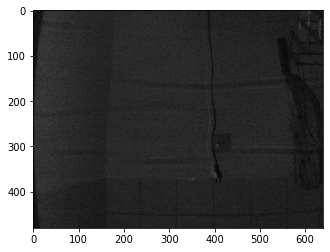

(150, 1)


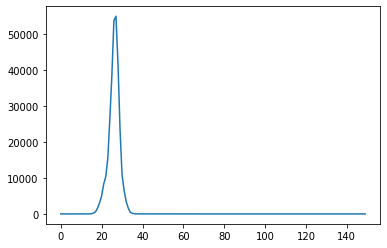

In [4]:
%matplotlib inline
img = cv2.imread(os.path.join(path_ir, files[0]), cv2.IMREAD_ANYDEPTH)
max_val = np.amax(img)
print(img.dtype)
plt.imshow(img, cmap="gray")
plt.show()
hist = cv2.calcHist([img], [0], None, [150], [0,65535])
print(hist.shape)
plt.plot(hist)
#plt.xlim([0,max_val])
#plt.yscale('log')
plt.show()

In [5]:
print(hist.shape)
print(hist.dtype)

(150, 1)
float32


In [28]:
hist[10000][0]

0.0

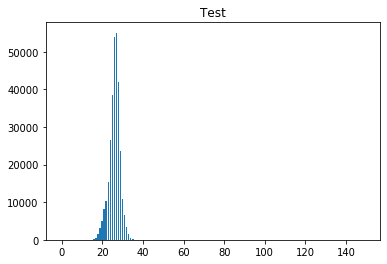

In [6]:
fig, axs = plt.subplots(1)
axs.bar(np.arange(hist.shape[0]), hist.reshape(hist.shape[0]))
axs.set_title('Test')
plt.show()

## The main algorithm

In [8]:
hist_depth_all = np.zeros((150,1), dtype=np.float32)
hist_ir_all = np.zeros((150,1), dtype=np.float32)
for idx, name in enumerate(files):
    ir = cv2.imread(os.path.join(path_ir, name), cv2.IMREAD_ANYDEPTH)
    depth = cv2.imread(os.path.join(path_depth, name), cv2.IMREAD_ANYDEPTH)
    hist_ir = cv2.calcHist([ir], [0], None, [150], [0,65535])
    hist_ir_all += hist_ir
    hist_depth = cv2.calcHist([depth], [0], None, [150], [0,65535])
    hist_depth_all += hist_depth

## Plot histograms

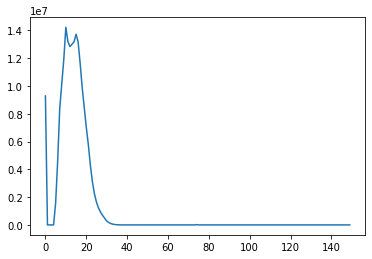

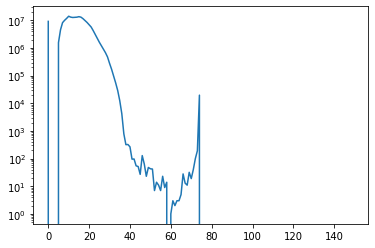

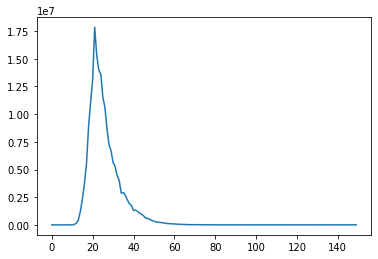

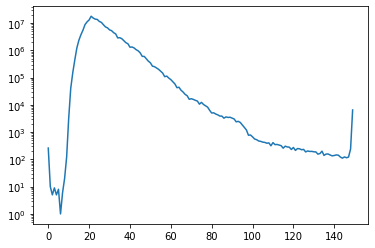

In [9]:
%matplotlib inline
plt.plot(hist_depth_all)
plt.show()
plt.plot(hist_depth_all)
plt.yscale('log')
plt.show()
plt.plot(hist_ir_all)
plt.show()
plt.plot(hist_ir_all)
plt.yscale('log')
plt.show()